In [1]:
!pip install tensorflow numpy pandas seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


---

# Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plotting a sample

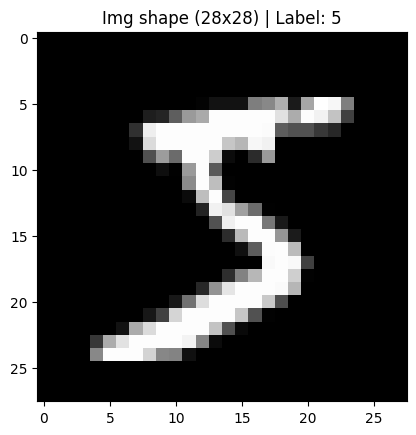

In [5]:
sample_idx = 0

plt.imshow(x_train[sample_idx], cmap='gray')
plt.title(f'Img shape ({x_train[sample_idx].shape[0]}x{x_train[sample_idx].shape[1]}) | Label: {y_train[sample_idx]}')
plt.show()

## One-hot Encoding the labels

In [6]:
y_train_oh = keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = keras.utils.to_categorical(y_test, num_classes=10)

## Flattening images

In [7]:
fltn = Flatten()

x_train = fltn(x_train)
x_test  = fltn(x_test)

## Normalizing input

In [8]:
x_train = x_train/255
x_test = x_test/255

---

# Neural Network

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=len(x_train[0])))
model.add(Dense(10, activation='softmax', input_dim=512))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        keras.metrics.CategoricalAccuracy(name='Accuracy'),
        keras.metrics.Precision(name='Precision'),
        keras.metrics.Recall(name='Recall'),
        keras.metrics.F1Score(name='F1', average='micro'),
    ]
)

model.summary()

c:\Users\12ped\anaconda3\envs\MLENG\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    x=x_train,
    y=y_train_oh,
    batch_size=50,
    epochs=25,
    shuffle=True,
    validation_data=(x_test, y_test_oh)
)

Epoch 1/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8959 - F1: 0.8959 - Precision: 0.9432 - Recall: 0.8431 - loss: 0.3651 - val_Accuracy: 0.9667 - val_F1: 0.9667 - val_Precision: 0.9726 - val_Recall: 0.9621 - val_loss: 0.1149
Epoch 2/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9739 - F1: 0.9739 - Precision: 0.9785 - Recall: 0.9701 - loss: 0.0882 - val_Accuracy: 0.9765 - val_F1: 0.9765 - val_Precision: 0.9799 - val_Recall: 0.9733 - val_loss: 0.0747
Epoch 3/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9826 - F1: 0.9826 - Precision: 0.9849 - Recall: 0.9807 - loss: 0.0564 - val_Accuracy: 0.9804 - val_F1: 0.9804 - val_Precision: 0.9828 - val_Recall: 0.9784 - val_loss: 0.0665
Epoch 4/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9877 - F1: 0.9877 - Precision: 0.9892 - Recall: 0.9863 - loss: 0.0390 - val_Accuracy: 0.9811 - val_F1: 0.9811 - val_Precision: 0.9834 - val_Recall: 0.9794 - val_loss: 0.0609
Epoch 5/25
1200/1200 ━━━━━━━━━━━

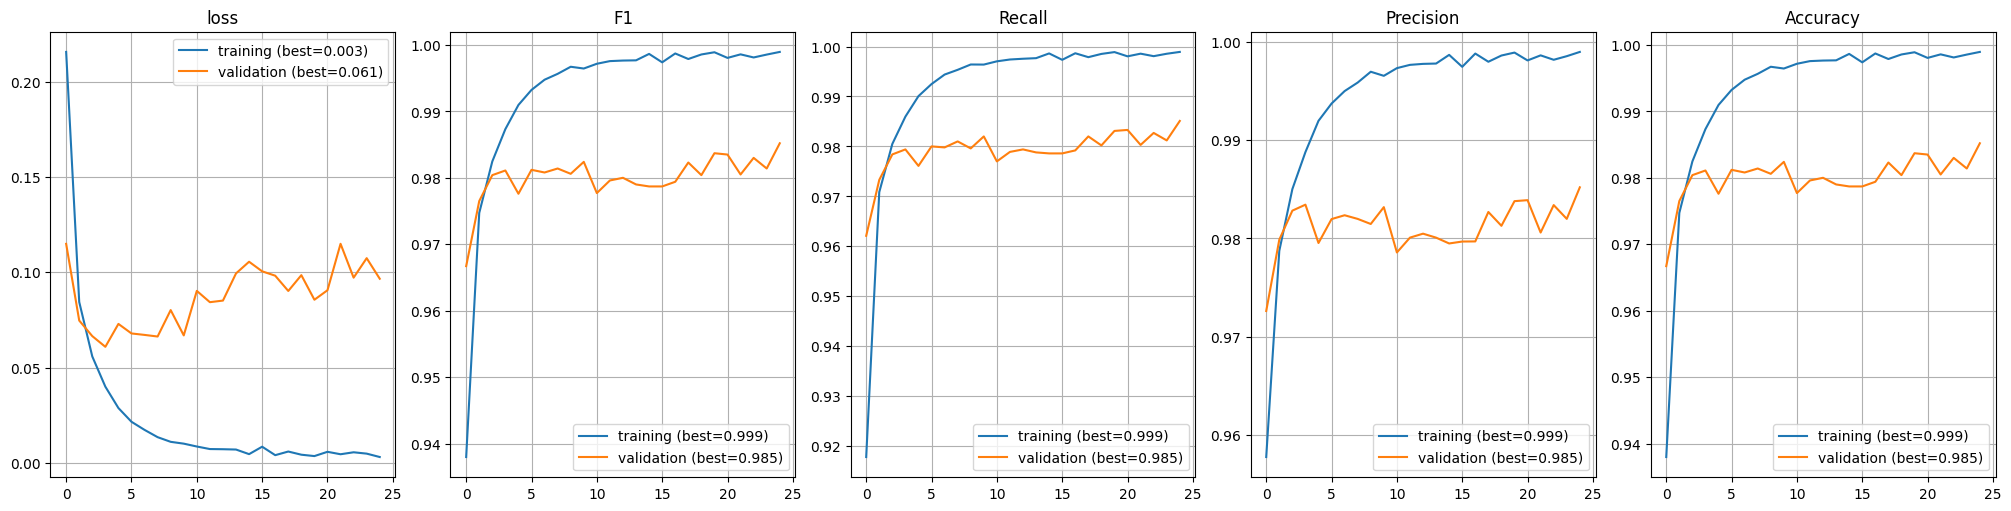

In [11]:
h_df = pd.DataFrame(history.history)

metrics = set([k.split('_')[-1] for k in history.history.keys()])

fig, axs = plt.subplots(ncols=len(metrics), nrows=1, constrained_layout=True, figsize=(20,5))

for plot_idx, metric in enumerate(metrics):
    best = h_df.max(0) if metric != 'loss' else h_df.min(0)
    axs[plot_idx].plot(
        history.history[metric],
        label=f'training (best={best[metric]:.3f})'
    )
    axs[plot_idx].plot(
        history.history['val_'+metric],
        label=f'validation (best={best["val_"+metric]:.3f})'
    )
    axs[plot_idx].grid(True)
    axs[plot_idx].set_title(metric)
    axs[plot_idx].legend()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


<Axes: >

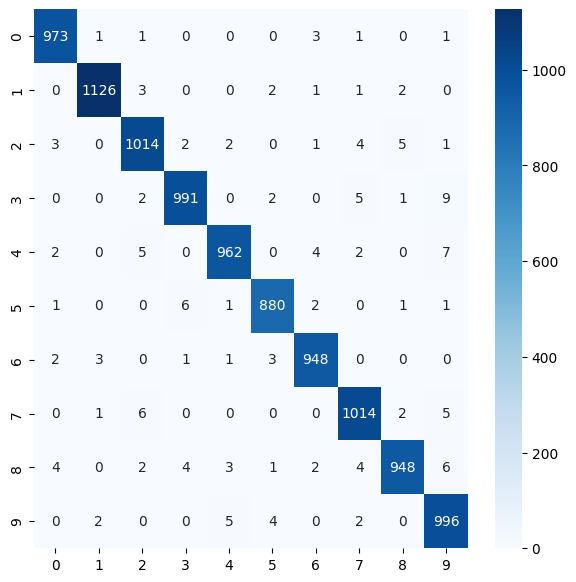

In [12]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis = 1)
# y_test_=np.argmax(y_test_, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
cf_matrix = confusion_matrix(y_test, y_prediction, normalize=None)

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues', ax=ax)